# Hand-crafted Data

In this notebook we shall compare and contrast the modeling capabilities of different functions provided in submodlib. To carefully observe the characteristics of the optimal set obtained by the maximization of these functions, we begin by creating a controlled dataset of 43 2D points as below. Specifically we have some clusters and some outliers in this dataset.

In [17]:
import numpy as np
groundData =np.array( [(4.5,13.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (15.5,6.5),
(7.5,10), (12.5,10), (10,12.5), (10,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]
masterData =np.array( [(6.7,13.5), (7.2,13.5), (7.7,13.5), (16.7,13.5), (17.2,13.5), (17.7,13.5),
(6.7,13), (7.2,13), (7.7,13), (16.7,13), (17.2,13), (17.7,13),
(6.7,12.5), (7.2,12.5), (7.7,12.5), (16.7,12.5), (17.2,12.5), (17.7,12.5),
(6.7,7.5), (7.2,7.5), (7.7,7.5), (16.7,7.5), (17.2,7.5), (17.7,7.5),
(6.7,7), (7.2,7), (7.7,7), (16.7,7), (17.2,7), (17.7,7),
(6.7,6.5), (7.2,6.5), (7.7,6.5), (16.7,6.5), (17.2,6.5), (17.7,6.5)] )
masterxs = [x[0] for x in masterData]
masterys = [x[1] for x in masterData]

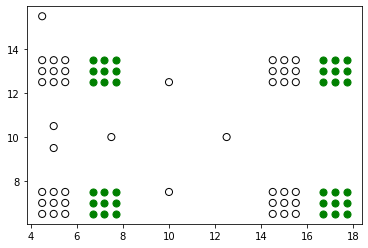

In [18]:
import matplotlib.pyplot as plt
#plt.scatter(groundxs, groundys, s=50, color='black', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(masterxs, masterys, s=50, color='green', label="Images")

# Selection by Facility Location

Following the basic usage of functions as discussed in [Basic Usage](Basic%20Usage.ipynb) we instantiate a [FacilityLocation](https://submodlib.readthedocs.io/en/latest/functions/facilityLocation.html) object (in this paerticular case a dense similarity kernel will be created internally in C++) and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

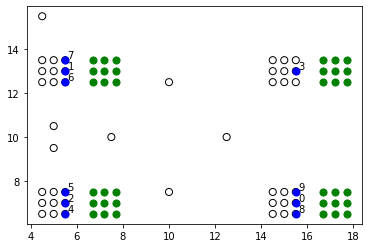

In [19]:
from submodlib import FacilityLocationFunction
objFL = FacilityLocationFunction(n=43, data=groundData, separate_master=True, n_master=36, data_master=masterData, mode="dense", metric="euclidean")
greedyList = objFL.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(masterxs, masterys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

In case of FacilityLocation we observe that the cluster centers get picked up first followed by the other diverse oints in the data set and the outlier point is picked up only at the end. Had the budget been less than 10, the outlier wouldn't even have got picked up. This is expected as Facility Location primarily models **representation**. 

# Selection by Disparity Sum

Following the basic usage of functions as discussed in [Basic Usage](Basic%20Usage.ipynb) we instantiate a [DisparitySum](https://submodlib.readthedocs.io/en/latest/functions/disparitySum.html) object (in this particular case a dense similarity kernel will be created internally in C++) and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

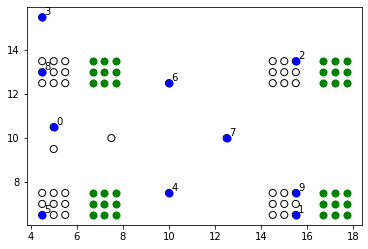

In [20]:
from submodlib import DisparitySumFunction
objDM = DisparitySumFunction(n=43, data=groundData, mode="dense", metric="euclidean")
greedyList = objDM.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(masterxs, masterys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

In case of DisparitySum we observe that the remote corner points get picked up first followed by the other diverse points in the data set **including** the outlier point. This is expected as Disparity Sum primarily models **diversity** and wouldn't mind picking up outlier points if that makes the set diverse enough, compromising on the representativeness of the set with respect to the ground set.

# Selection by Feature Based Function

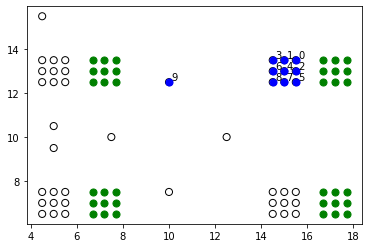

In [21]:
from submodlib import FeatureBasedFunction
features = groundData.tolist()
objFB = FeatureBasedFunction(n=43, features=features, numFeatures=2, sparse=False)
greedyList = objFB.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(masterxs, masterys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

# Selection by GraphCut Function

## Lambda = 0 (Only representation)

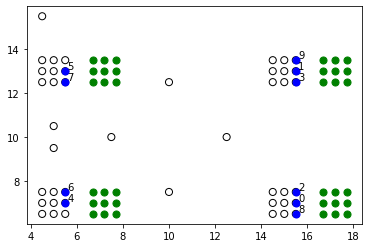

In [23]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n=43, mode="dense", separate_master=True, n_master=36, data_master=masterData, lambdaVal=0, data=groundData, metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(masterxs, masterys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## Lambda = 1 (Some representation, some diversity)

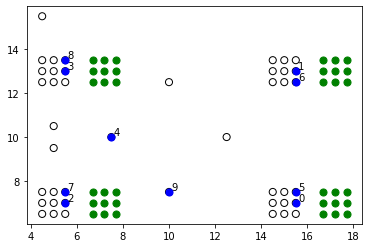

In [25]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n=43, mode="dense", separate_master=True, n_master=36, data_master=masterData, lambdaVal=1, data=groundData, metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(masterxs, masterys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## Lambda = 5 (Diversity)

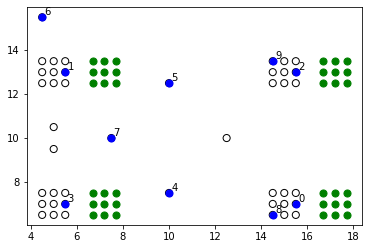

In [24]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n=43, mode="dense", separate_master=True, n_master=36, data_master=masterData, lambdaVal=5, data=groundData, metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(masterxs, masterys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))